In [1]:
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [2]:

from bert_score import BERTScorer

import matplotlib.pyplot as plt


In [3]:
reference = """
what is acne and how i treated my acne.
Acne is a common skin disease characterized by pimples on the face, chest, and back. It occurs when the pores of the skin become clogged with oil, dead skin cells, and bacteria.
Acne treatment consists of reducing sebum pro duction, removing dead skin cells, and killing bacteria with topical drugs and oral medications. Treatment choice depends upon whether the acne is mild, mod erate, or severe.

today morning i suffering from cough, why happening, which disease?
Coughing can be a symptom of adenovirus infections, which may also include fever, runny nose, and sore throat, or it could be related to lung infections that can lead to ARDS (Acute Respiratory Distress Syndrome).  It's also a symptom of Acute Lymphangitis

Referance: medical text book.
"""

# candidate means Response generate by LLM and RAG



Light RAG

In [4]:
candidate = """
what is acne and how i treated my acne.
Acne is a common skin disease characterized by pimples, inflammation, and potential scarring, arising when skin pores become clogged with oil, dead skin cells, and bacteria.
treatment involves topical and oral medications, comedone extraction, chemical peels, dermabrasion, punch grafting, intralesional injection and collagen injection.

today morning i suffering from cough, why happening, which diseas?
Coughing can be a symptom of adenovirus infections, which may also include fever, runny nose, and sore throat, or it could be related to lung infections that can lead to ARDS (Acute Respiratory Distress Syndrome) if not treated promptly [KG] unknown_source. It's also a symptom of Acute Lymphangitis [KG] unknown_source.

References: medical text book.
# """

In [5]:
# BERTScore calculation
scorer = BERTScorer(model_type='bert-base-uncased')
result = scorer.score([candidate], [reference])
P, R, F1 = scorer.score([candidate], [reference])
print(f" result of BERTScore : {result} ")
print(f"BERTScore Precision: {P.mean():.4f}, Recall: {R.mean():.4f}, F1: {F1.mean():.4f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

 result of BERTScore : (tensor([0.8106]), tensor([0.8490]), tensor([0.8294])) 
BERTScore Precision: 0.8106, Recall: 0.8490, F1: 0.8294


In [6]:
Light_RAG={"P":P.mean(),"R":R.mean(),"F1":F1.mean()}

In [ ]:
plt.hist(F1, bins=20)
plt.show()

Graph RAG

In [7]:
candidate="""
what is acne and how i treated my acne.
potential scarring, arising from inflamed sebaceous glands and can be treated with topical and oral medications, comedone extraction, chemical peels, dermabrasion, intralesional injection and collagen injection.

today morning i suffering from cough, why happening, which diseas?
Coughing can be a symptom of adenovirus infections, which may also include fever, runny nose, and sore throat. Lung infection can lead to ARDS.

References: medical text book.
"""

In [8]:
# BERTScore calculation
scorer = BERTScorer(model_type='bert-base-uncased')
# result = scorer.score([candidate], [reference])
P, R, F1 = scorer.score([candidate], [reference])
# print(f" result of BERTScore : {result} ")
print(f"BERTScore Precision hybrid model - Graph RAG : {P.mean():.4f}, Recall: {R.mean():.4f}, F1: {F1.mean():.4f}")

BERTScore Precision hybrid model - Graph RAG : 0.7332, Recall: 0.6752, F1: 0.7030


In [9]:
Graph_RAG={"P":P.mean(),"R":R.mean(),"F1":F1.mean()}

Navia RAG

In [10]:
candidate="""
what is acne and how i treated my acne.
Acne is a common skin disease with pimples on the face, chest, and back, caused by clogged pores with oil, dead skin cells, and bacteria; treatment involves reducing sebum production, removing dead skin cells, and killing bacteria with topical and oral medications, with the choice depending on the severity of the acne.

today morning i suffering from cough, why happening, which diseas?
Coughing is not mentioned as a symptom of any disease in the provided documents.

References : medical text book.
 """

In [11]:
# BERTScore calculation
scorer = BERTScorer(model_type='bert-base-uncased')
# result = scorer.score([candidate], [reference])
P, R, F1 = scorer.score([candidate], [reference])
# print(f" result of BERTScore : {result} ")
print(f"BERTScore Precision navie RAG : {P.mean():.4f}, Recall: {R.mean():.4f}, F1: {F1.mean():.4f}")

BERTScore Precision navie RAG : 0.8215, Recall: 0.7335, F1: 0.7750


In [12]:

Navia_RAG={"P":P.mean(),"R":R.mean(),"F1":F1.mean()}

plot graph

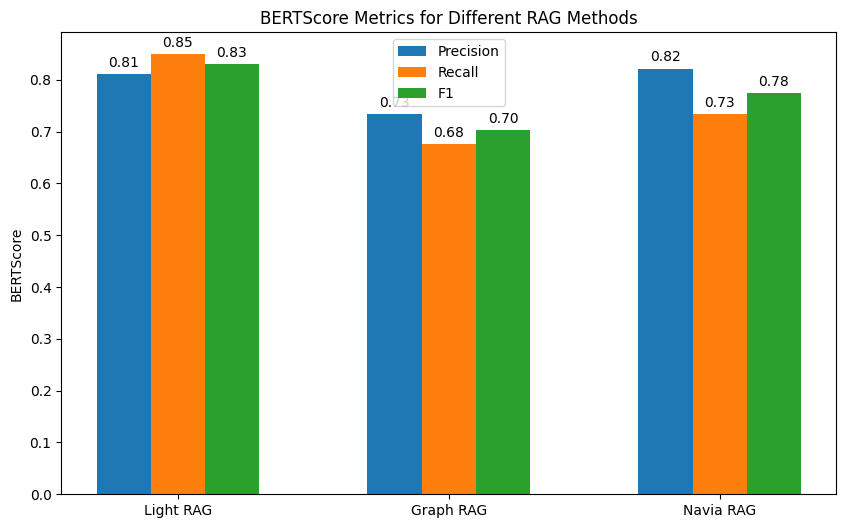

In [14]:
labels = ['Light RAG', 'Graph RAG', 'Navia RAG']
precision_scores = [Light_RAG['P'].item(), Graph_RAG['P'].item(), Navia_RAG['P'].item()]
recall_scores = [Light_RAG['R'].item(), Graph_RAG['R'].item(), Navia_RAG['R'].item()]
f1_scores = [Light_RAG['F1'].item(), Graph_RAG['F1'].item(), Navia_RAG['F1'].item()]

x = range(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar([i - width for i in x], precision_scores, width, label='Precision')
rects2 = ax.bar(x, recall_scores, width, label='Recall')
rects3 = ax.bar([i + width for i in x], f1_scores, width, label='F1')

ax.set_ylabel('BERTScore')
ax.set_title('BERTScore Metrics for Different RAG Methods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.savefig('bertscore_rag_comparison.png')

plt.show()